In [66]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Companies

### Import data on revenues

In [38]:
data_comp=pd.read_excel("sales_2016_01.xlsx", dtype="str")
data_comp = data_comp.append(pd.read_excel("sales_2016_02.xlsx", dtype="str"))
del(data_comp["Mark"])
data_comp.columns=["comp_name", "comp_edrpou", "comp_rev_2016"]
print ("Shape of the initial dataset on companies", data_comp.shape)
data_comp.head(3)

Shape of the initial dataset on companies (264702, 3)


,comp_name,comp_edrpou,comp_rev_2016
0,ЕНЕРГОРИНОК ДП,21515381,131022292
1,УКРАЇНСЬКА ЗАЛІЗНИЦЯ ПУБЛІЧНЕ АТ,40075815,67527835
2,УКРГАЗВИДОБУВАННЯ ПУБЛІЧНЕ АТ,30019775,55041146


Extract the first number from revenue:

In [39]:
data_comp["rev_1st_num"]=data_comp["comp_rev_2016"].str[:1]

In [40]:
data_comp.head(3)

,comp_name,comp_edrpou,comp_rev_2016,rev_1st_num
0,ЕНЕРГОРИНОК ДП,21515381,131022292,1
1,УКРАЇНСЬКА ЗАЛІЗНИЦЯ ПУБЛІЧНЕ АТ,40075815,67527835,6
2,УКРГАЗВИДОБУВАННЯ ПУБЛІЧНЕ АТ,30019775,55041146,5


Remove redundant numbers (0 and -):

In [41]:
data_comp=data_comp[(data_comp["rev_1st_num"]!="0") & (data_comp["rev_1st_num"]!="-")]

### Calculation

In [65]:
BL_comp = pd.DataFrame(data_comp["rev_1st_num"].value_counts()).reset_index()
BL_comp["index"] = BL_comp["index"].apply(int)
BL_comp["rev_1st_num"] = BL_comp["rev_1st_num"].apply(int)

BL_comp["perc_BL"] = round(100 * np.log10(1+(1/BL_comp["index"])), 3)
BL_comp["perc_real"] = round(100 * BL_comp["rev_1st_num"]/sum(BL_comp["rev_1st_num"]), 3)

BL_comp

,index,rev_1st_num,perc_BL,perc_real
0,1,71849,30.103,30.030
1,2,41705,17.609,17.431
2,3,30019,12.494,12.547
3,4,24071,9.691,10.061
4,5,18524,7.918,7.742
5,6,15744,6.695,6.580
6,7,13688,5.799,5.721
7,8,12296,5.115,5.139
8,9,11363,4.576,4.749


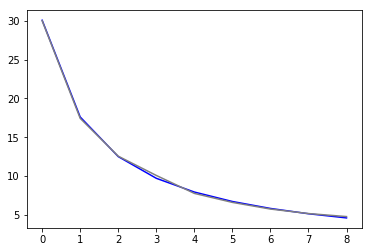

In [73]:
plt.plot(BL_comp["perc_BL"], c="blue")
plt.plot(BL_comp["perc_real"], c="gray")